# Problem Set 2 - A

## Yanwei Pan
panyw@uchicago.edu

### Question 1: Numerical differentiation exercises

In [3]:
import numpy as np
import sympy as sy
from matplotlib import pyplot as plt
import math

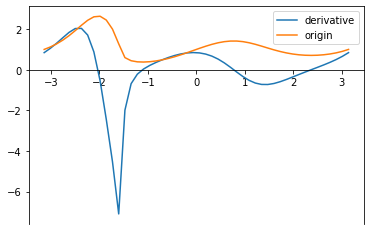

In [152]:
#############Problem 1#############
def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
x = sy.symbols('x')
f_x = sy.lambdify(x, sy.diff(f(x), x))

x_array = np.linspace(-math.pi, math.pi)
f = sy.lambdify(x, (sy.sin(x) + 1) ** (sy.sin(sy.cos(x))))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(x_array, f_x(x_array), label = 'derivative')
plt.plot(x_array, f(x_array), label = 'origin')
plt.legend()
plt.show()

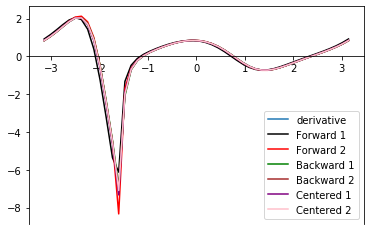

In [165]:
#############Problem 2#############

#Forward 1
def g_x(s, x, h):
    return (s(x + h) - s(x)) / h

#Forward 2
def q_x(s, x, h):
    return (-3 * s(x) + 4 * s(x + h) - s(x + 2 * h )) / (2 * h)

#Backward 1
def w_x(s, x, h):
    return (s(x) - s(x - h)) / h

#Backward 2
def h_x(s, x, h):
    return (3 * s(x) - 4 * s(x - h) + s(x - 2 * h )) / (2 * h)

#Centered 1
def j_x(s, x, h):
    return (s(x + h) - s(x - h)) / (2 * h)

#Centered 2
def k_x(s, x, h):
    return (s(x - 2 * h) - 8 * s(x - h) + 8 * s(x + h) - s(x + 2 * h )) / (12 * h)

plt.plot(x_array, f_x(x_array), label = 'derivative')
plt.plot(x_array, g_x(f, x_array, 0.1), label = 'Forward 1', color = 'black')
plt.plot(x_array, q_x(f, x_array, 0.1), color = 'red', label = 'Forward 2')
plt.plot(x_array, w_x(f, x_array, 0.01), color = 'green', label = 'Backward 1')
plt.plot(x_array, h_x(f, x_array, 0.01), color = 'brown', label = 'Backward 2')
plt.plot(x_array, g_x(f, x_array, 0.01), label = 'Centered 1', color = 'purple')
plt.plot(x_array, k_x(f, x_array, 0.01), color = 'pink', label = 'Centered 2')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend()
plt.show()


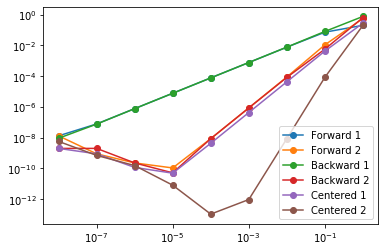

In [169]:
#############Problem 3#############

h_array = np.logspace(-8, 0, 9)
f_list = [g_x, q_x, w_x, h_x, j_x, k_x]
def absol_error(l, x, h):
    return abs(f_x(x) - l(f, x, h))
plt.figure()
for fx in f_list:
    plt.plot(h_array, absol_error(fx, 1, h_array), marker = 'o')
plt.loglog()
plt.legend(['Forward 1', 'Forward 2', 'Backward 1', 'Backward 2', 'Centered 1', 'Centered 2'], loc='lower right')
axes = plt.gca()
plt.show()

In [199]:
#############Problem 4#############

import pandas as pd
data = np.load('plane.npy')

def x(a, b):
    alpha = np.deg2rad(a)
    beta = np.deg2rad(b)
    return 500 * sy.tan(beta) / (sy.tan(beta) - sy.tan(alpha))

def y(a, b):
    alpha = np.deg2rad(a)
    beta = np.deg2rad(b)
    return 500 * sy.tan(beta) * sy.tan(alpha) / (sy.tan(beta) - sy.tan(alpha))

a_b_array = data[:, 1:3]
xy = []
for i in a_b_array:
    x_cor = x(i[0], i[1])
    y_cor = y(i[0], i[1])
    xy.append((x_cor,y_cor))
    
def value_x(t):
    return xy[t-7][0]

def value_y(t):
    return xy[t-7][1]

def speed(x, y):
    return (x ** 2 + y ** 2) ** (1/2)

#t = 7
speed_7 = speed(g_x(value_x, 7, 1), g_x(value_y, 7, 1))

#t = 14
speed_14 = speed(w_x(value_x, 14, 1), w_x(value_y, 14, 1))

#t = 8, 9, ..., 13
speed = [speed(j_x(value_x, i, 1), j_x(value_y, i, 1)) for i in range(8, 14)]
speed.insert(0, speed_7)
speed.append(speed_14)
speed_array = np.array(speed)
speed_df = pd.DataFrame(data = speed_array, columns = {'speed'}, index = {7, 8, 9, 10, 11, 12, 13, 14})
speed_df

,speed
7,46.4242006221339
8,47.0010393809528
9,48.9988051403680
10,50.0994416296530
11,48.2903508382048
12,51.5645590492724
13,53.9230335450535
14,51.5148005696361


In [223]:
#############Problem 5#############

def df(s, a, h, x0):
    s_dimension = len(s)
    j = len(a)
    j_matrix = np.zeros((s_dimension, j))
    I = np.identity(j)
    for i in range(s_dimension):
        for c in range(j):
            j_matrix[i][c] = (s[i](x0 + h * I[:, c]) - s[i](x0 - h * I[:, c])) / (2 * h)
    return j_matrix

#test
def f1(l):
    return l[0] ** 2

def f2(l):
    return l[0] ** 3 - l[1] 
df([f1, f2], [x, y], 1, [0, 0])

array([[ 0.,  0.],
       [ 1., -1.]])

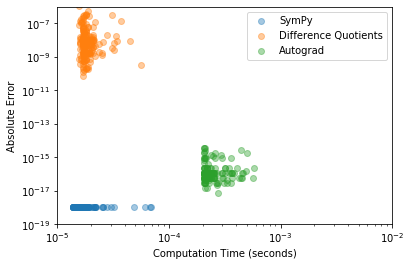

In [266]:
#############Problem 7#############

import time
from autograd import grad
import random
from autograd import numpy as anp
g = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))
ope_time_1 = []
ope_time_2 = []
ope_time_3 = []
error_1 = []
error_2 = []
error_3 = []
N = 200
#Calculate exact value
for i in range(N):
    x_0 = random.uniform(-2*np.pi, 2*np.pi)
    start_1 = time.time()
    a = f_x(x_0)
    end_1 = time.time()
    ope_time_1.append(end_1 - start_1)
    error_1.append(1e-18)

#Calculate fourth-order centered difference quotient
    start_2 = time.time()
    k_x(f, x_0, 0.001)
    end_2 = time.time()
    ope_time_2.append(end_2 - start_2) 
    error_2.append(abs(a - k_x(f, x_0, 0.01)))
    
#Calculate Autograd
    start_3 = time.time()
    df = grad(g)
    dx = df(x_0)
    end_3 = time.time()
    ope_time_3.append(end_3 - start_3) 
    error_3.append(abs(dx - f_x(x_0)))

#draw the plot
plt.scatter(ope_time_1, error_1, alpha=0.4, label='SymPy')
plt.scatter(ope_time_2, error_2, alpha=0.4, label='Difference Quotients')
plt.scatter(ope_time_3, error_3, alpha=0.4, label='Autograd')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.0e-5,1.0e-2)
plt.ylim(1.0e-19,1.0e-6)
plt.xlabel('Computation Time (seconds)')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()